# Lecture 2: Introduction to Julia

## Dataset

We will use Traffic Crash Reports data from Cincinnati City.

**Data description:** Traffic Crash Reports are records in the event of a CPD response to a traffic crash. The source of this data is the City of Cincinnati Police Department. The column names for this data are self explantory.

Filename: "Traffic\_Crash\_Reports_\_CPD_\_Aug2018.csv" 
*Make sure this file in the same directory as the ipynb file*

**Setup:** Use Julia 0.6.4 kernel. Install the packages CSV, Gadfly, Cairo and Fontconfig. 

In [1]:
Pkg.add("CSV",VersionNumber("0.2.5"));
Pkg.add("Gadfly",VersionNumber("0.8.0"));
Pkg.add("Cairo",VersionNumber("0.5.6"));
Pkg.add("Fontconfig",VersionNumber("0.1.1"))
Pkg.add("RDatasets",VersionNumber("0.4.0"))

INFO: Package CSV is already installed
INFO: Package Gadfly is already installed
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] uuid4(::MersenneTwister) at ./deprecated.jl:57
 [3] msg_header at /usr/local/julia/0.6.4/site/v0.6/IJulia/src/msg.jl:18 [inlined]
 [4] msg_pub(::IJulia.Msg, ::String, ::Dict{String,String}, ::Dict{String,Any}) at /usr/local/julia/0.6.4/site/v0.6/IJulia/src/msg.jl:30 (repeats 2 times)
 [5] send_stream(::String) at /usr/local/julia/0.6.4/site/v0.6/IJulia/src/stdio.jl:172
 [6] send_stdio(::String) at /usr/local/julia/0.6.4/site/v0.6/IJulia/src/stdio.jl:130
 [7] (::Base.##302#303{IJulia.#send_stderr,Timer})() at ./event.jl:436
while loading In[1], in expression starting on line 2
INFO: Package Cairo is already installed
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] uuid4(::MersenneTwister) at ./deprecated.jl:57
 [3] msg_header at /usr/local/julia/0.6.4/site/v0.6/IJulia/src/msg.jl:18 [inlined]
 [4] msg_pub(::IJulia

Use the packages...

In [2]:
using CSV, DataFrames, Gadfly, Cairo, Fontconfig, RDatasets;

## Questions

Write Julia code to answer the following questions:

**Q 1:** Load this data (Traffic_Crash_Reports__CPD__Aug2018.csv) into memory.

In [3]:
data = CSV.read("Traffic_Crash_Reports__CPD__Aug2018.csv", delim=",", missingstring="NA", rows_for_type_detect=2568);

**Q 2:** What is the size of the dataset? How many data points and how many attributes?

In [4]:
size(data)

(2567, 25)

**Q 3:** Create a new Dataframe 'new_data' by selecting the columns AGE, CRASHSEVERITY, DAYOFWEEK, GENDER, INJURIES, LIGHTCONDITIONSPRIMARY, LOCALREPORTNO, MANNEROFCRASH, ROADSURFACE, WEATHER, and ZIP

*Use the new_data Dataframe for **Q4** and **Q5**.*

In [5]:
new_data = data[:, [:AGE, :CRASHSEVERITY, :DAYOFWEEK, :GENDER, :INJURIES, :LIGHTCONDITIONSPRIMARY, :LOCALREPORTNO, :MANNEROFCRASH, :ROADSURFACE, :WEATHER, :ZIP]]

,AGE,CRASHSEVERITY,DAYOFWEEK,GENDER,INJURIES,LIGHTCONDITIONSPRIMARY,LOCALREPORTNO,MANNEROFCRASH,ROADSURFACE,WEATHER,ZIP
1,18-25,3 - PROPERTY DAMAGE ONLY (PDO),FRI,M - MALE,1 - NO INJURY / NONE REPORTED,1 - DAYLIGHT,185011500,2 - REAR-END,1 - CONCRETE,1 - CLEAR,45237
2,31-40,2 - INJURY,THU,M - MALE,1 - NO INJURY / NONE REPORTED,1 - DAYLIGHT,185011781,2 - REAR-END,"2 - BLACKTOP, BITUMINOUS, ASPHALT",1 - CLEAR,45211
3,26-30,2 - INJURY,FRI,M - MALE,2 - POSSIBLE,5 - DARK – ROADWAY NOT LIGHTED,185011134,6 - ANGLE,"2 - BLACKTOP, BITUMINOUS, ASPHALT",1 - CLEAR,45205
4,41-50,3 - PROPERTY DAMAGE ONLY (PDO),MON,M - MALE,1 - NO INJURY / NONE REPORTED,1 - DAYLIGHT,185011974,2 - REAR-END,"2 - BLACKTOP, BITUMINOUS, ASPHALT",1 - CLEAR,45208
5,26-30,3 - PROPERTY DAMAGE ONLY (PDO),FRI,M - MALE,1 - NO INJURY / NONE REPORTED,1 - DAYLIGHT,185011098,2 - REAR-END,"2 - BLACKTOP, BITUMINOUS, ASPHALT",2 - CLOUDY,45214
6,UNDER 18,2 - INJURY,WED,F - FEMALE,1 - NO INJURY / NONE REPORTED,1 - DAYLIGHT,185011359,2 - REAR-END,"2 - BLACKTOP, BITUMINOUS, ASPHALT",4 - RAIN,45213
7,26-30,3 - PROPERTY DAMAGE ONLY (PDO),SAT,M - MALE,1 - NO INJURY / NONE REPORTED,9 - UNKNOWN,185011197,"8 - SIDESWIPE, OPPOSITE DIRECTION","2 - BLACKTOP, BITUMINOUS, ASPHALT",1 - CLEAR,45223
8,61-70,3 - PROPERTY DAMAGE ONLY (PDO),TUE,M - MALE,1 - NO INJURY / NONE REPORTED,1 - DAYLIGHT,185011287,6 - ANGLE,"2 - BLACKTOP, BITUMINOUS, ASPHALT",1 - CLEAR,45237
9,18-25,2 - INJURY,FRI,F - FEMALE,2 - POSSIBLE,1 - DAYLIGHT,185010761,2 - REAR-END,"2 - BLACKTOP, BITUMINOUS, ASPHALT",1 - CLEAR,45223
10,51-60,3 - PROPERTY DAMAGE ONLY (PDO),TUE,M - MALE,1 - NO INJURY / NONE REPORTED,1 - DAYLIGHT,185011997,5 - BACKING,"2 - BLACKTOP, BITUMINOUS, ASPHALT",1 - CLEAR,45219


**Q 4:** Using describe() function, list the different element types in the new data frame. Also list the columns in which there are missing values.


In [6]:
describe(new_data[:, :]) 

,variable,mean,min,median,max,nunique,nmissing,eltype
1,AGE,,,,,9,0,CategoricalArrays.CategoricalString{UInt32}
2,CRASHSEVERITY,,,,,3,0,CategoricalArrays.CategoricalString{UInt32}
3,DAYOFWEEK,,,,,7,0,CategoricalArrays.CategoricalString{UInt32}
4,GENDER,,,,,2,299,CategoricalArrays.CategoricalString{UInt32}
5,INJURIES,,,,,5,10,CategoricalArrays.CategoricalString{UInt32}
6,LIGHTCONDITIONSPRIMARY,,,,,8,0,CategoricalArrays.CategoricalString{UInt32}
7,LOCALREPORTNO,,,,,1319,0,CategoricalArrays.CategoricalString{UInt32}
8,MANNEROFCRASH,,,,,9,0,CategoricalArrays.CategoricalString{UInt32}
9,ROADSURFACE,,,,,5,0,CategoricalArrays.CategoricalString{UInt32}
10,WEATHER,,,,,5,0,CategoricalArrays.CategoricalString{UInt32}


**Q 5:** Create a new dataframe 'newdata_nomissing' by removing the rows in the missing values from the new_data Dataframe. How many rows have been removed in this process?

In [7]:
size(new_data)

(2567, 11)

In [25]:
new_data_nomissing = dropmissing(new_data);
size(new_data_nomissing)

(2250, 11)

317 rows were removed by this process. As per the nmissing data it should be 327, but dropmissing is removing 317.

*For the following questions until **Q15** use new_data_nomissing dataframe.*

**Q 6:** Generate a list of the different types of crashes in this data.

In [9]:
unique(new_data_nomissing[:MANNEROFCRASH])

9-element Array{Union{Missings.Missing, String},1}:
 "2 - REAR-END"                                             
 "6 - ANGLE"                                                
 "8 - SIDESWIPE, OPPOSITE DIRECTION"                        
 "5 - BACKING"                                              
 "1 - NOT COLLISION BETWEEN TWO MOTOR VEHICLES IN TRANSPORT"
 "7 - SIDESWIPE, SAME DIRECTION"                            
 "3 - HEAD-ON"                                              
 "9 - UNKNOWN"                                              
 "4 - REAR-TO-REAR"                                         

**Q 7:** Generate a list of the different types of WEATHER conditions in this data.

In [10]:
unique(new_data_nomissing[:WEATHER])

5-element Array{Union{Missings.Missing, String},1}:
 "1 - CLEAR"           
 "2 - CLOUDY"          
 "4 - RAIN"            
 "9 - OTHER/UNKNOWN"   
 "3 - FOG, SMOG, SMOKE"

**Q 8:** Determine the number of crashes happened in each of these weather conditions using by() function.

In [11]:
ans = by(new_data_nomissing, :WEATHER, nrow)

,WEATHER,x1
1,1 - CLEAR,1519
2,2 - CLOUDY,402
3,4 - RAIN,321
4,9 - OTHER/UNKNOWN,7
5,"3 - FOG, SMOG, SMOKE",1


**Q 9:** Generate a list of the different light conditions in this data.

In [12]:
unique(new_data_nomissing[:LIGHTCONDITIONSPRIMARY])

7-element Array{Union{Missings.Missing, String},1}:
 "1 - DAYLIGHT"                       
 "5 - DARK – ROADWAY NOT LIGHTED"     
 "9 - UNKNOWN"                        
 "4 - DARK - LIGHTED ROADWAY"         
 "6 - DARK – UNKNOWN ROADWAY LIGHTING"
 "2 - DAWN"                           
 "3 - DUSK"                           

**Q 10:** Determine the number of crashes happened in each combination of weather and light conditions using by() function. State which combination of weather and ligt conditions result in most number of crashes.

In [13]:
ans1 = by(new_data_nomissing, [:WEATHER, :LIGHTCONDITIONSPRIMARY], nrow)

,WEATHER,LIGHTCONDITIONSPRIMARY,x1
1,1 - CLEAR,1 - DAYLIGHT,1200
2,1 - CLEAR,5 - DARK – ROADWAY NOT LIGHTED,9
3,2 - CLOUDY,1 - DAYLIGHT,347
4,4 - RAIN,1 - DAYLIGHT,245
5,1 - CLEAR,9 - UNKNOWN,1
6,1 - CLEAR,4 - DARK - LIGHTED ROADWAY,259
7,4 - RAIN,4 - DARK - LIGHTED ROADWAY,62
8,2 - CLOUDY,4 - DARK - LIGHTED ROADWAY,37
9,1 - CLEAR,6 - DARK – UNKNOWN ROADWAY LIGHTING,4
10,4 - RAIN,2 - DAWN,8


Clear and Daylight conditions count for most number of crashes.

**Q 11:** How many ZIP codes are covered in this data.

In [14]:
a = unique(new_data_nomissing[:ZIP])
size(unique(new_data_nomissing[:ZIP]))

(33,)

For the following questions that involve generating plots, you may use the white_panel theme.

In [15]:
white_panel = Theme(
    panel_fill=colorant"white",
    default_color=colorant"blue",
    major_label_font_size=12pt,
    minor_label_font_size=12pt,
    major_label_color=colorant"black",
    minor_label_color=colorant"black",
);

**Q 12:** Plot a bar graph showing the number of accidents in each of the ZIP codes

In [16]:
ans = by(new_data_nomissing, :ZIP, nrow)

,ZIP,x1
1,45237,145
2,45211,138
3,45205,97
4,45208,48
5,45214,173
6,45213,45
7,45223,112
8,45219,138
9,45229,110
10,45220,83


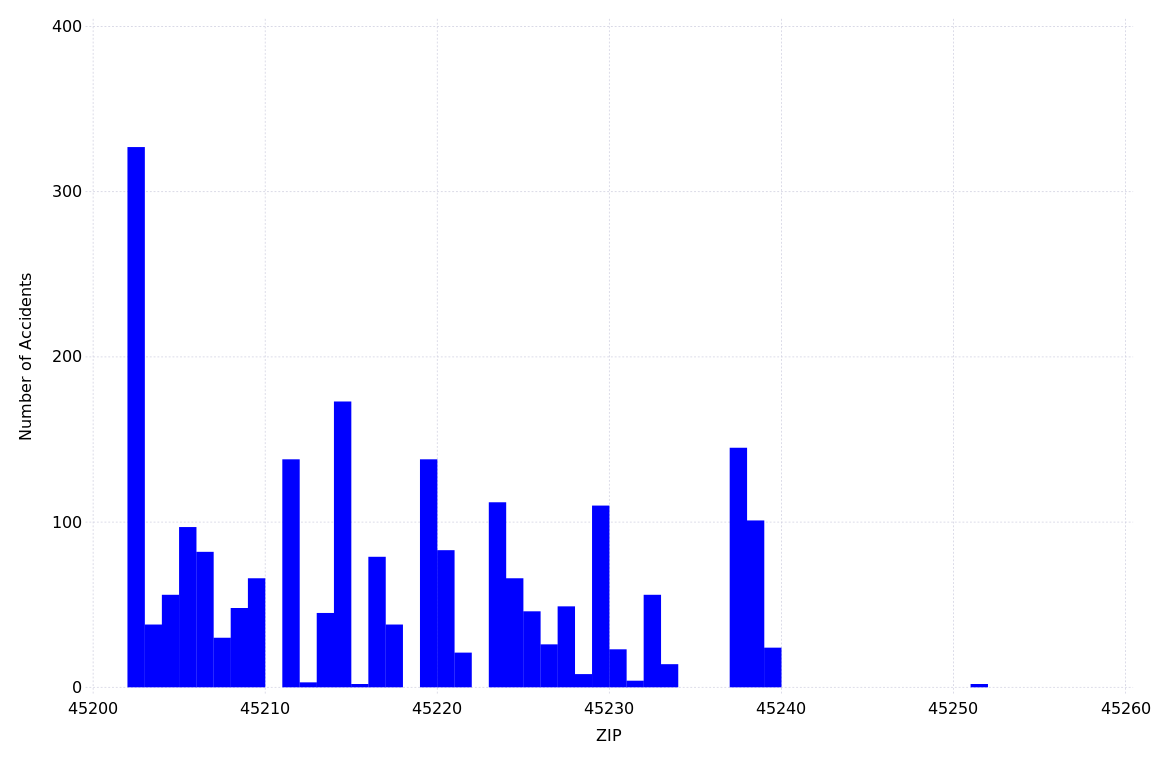

In [17]:
set_default_plot_size(12inch,8inch)
myplot1 = Gadfly.plot(new_data_nomissing, x = "ZIP", Geom.histogram, Guide.ylabel("Number of Accidents"), white_panel);
draw(PNG("./Figs/bar-plt1.png", 6inch, 6inch), myplot1)
myplot1

**Q 13:** Generate a scatter plot between weather and light conditions. State which combinations of weather and light conditions appear to have significantly higher number of crashes. Please use set_default_plot_size(12inch, 8inch) function to adjust the figure size as needed for visibility.

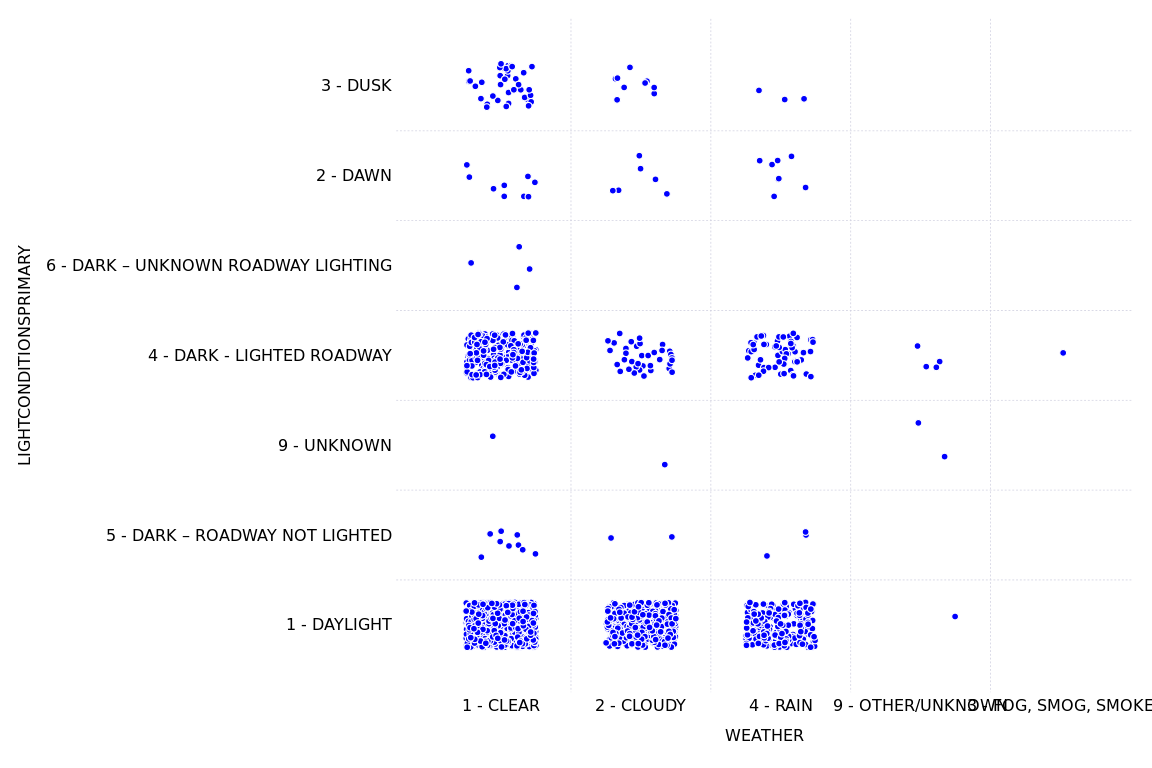

In [18]:
set_default_plot_size(12inch,8inch)
myplot2 = Gadfly.plot(new_data_nomissing, x = "WEATHER", y="LIGHTCONDITIONSPRIMARY", Stat.x_jitter(range=0.5, seed=10), Stat.y_jitter(range=0.5, seed=20),Geom.point, white_panel);
draw(PNG("./Figs/scatter-plt1.png", 6inch, 6inch), myplot2)
myplot2

Weather conditions of clear and light conditions of dark lighted road have most number of crashes followed by clear-daylight and cloudy-daylight.

**Q 14:** Generate a plot to view the number of crashes on different days of the week. On which day of the week do fewer crashes happen? On which day of the week do the highest number of crashes happen?

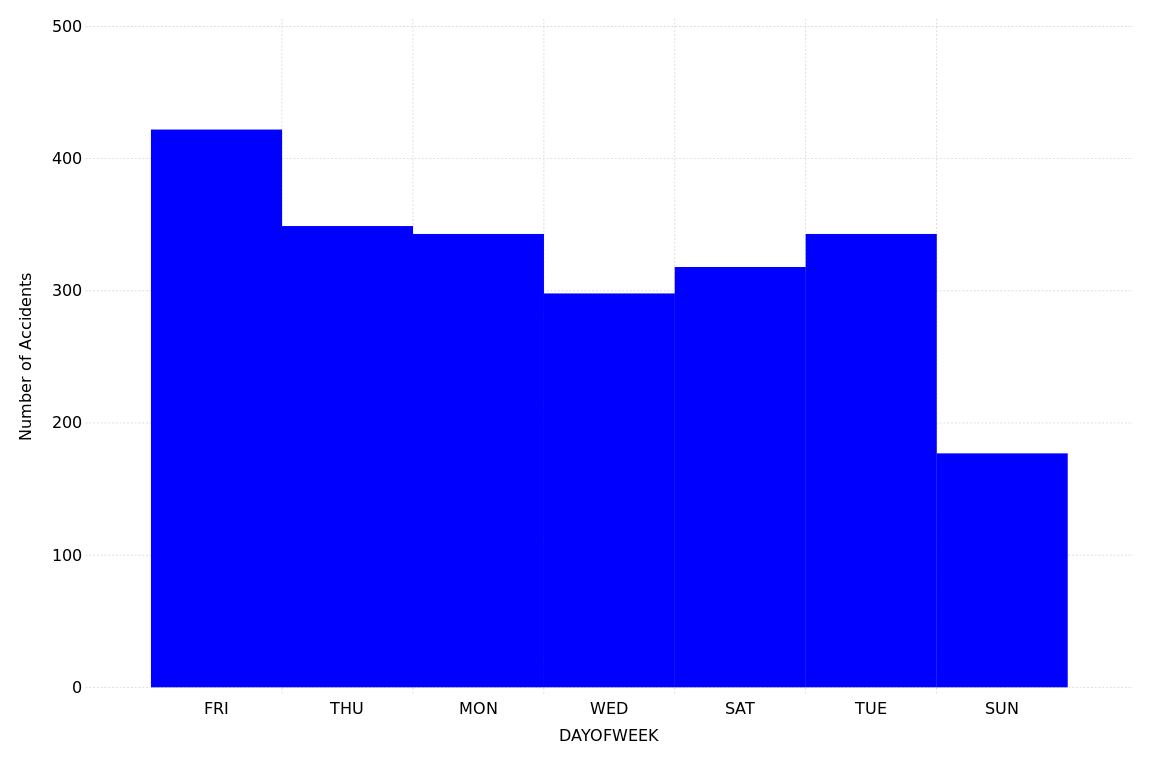

In [19]:
set_default_plot_size(12inch,8inch)
myplot3 = Gadfly.plot(new_data_nomissing, x = "DAYOFWEEK", Geom.histogram, Guide.ylabel("Number of Accidents"), white_panel);
draw(PNG("./Figs/bar-plt2.png", 6inch, 6inch), myplot3)
myplot3

There are fewer crashes on Sunday, as it seems to be last day of weekend so maybe less people came out on streets. Most number of crashes are seen on Friday, it is the first day of weekend and more people seems to be on street.

**Q 15:** Generate a plot to view the number of crashes reported per age-group. Which age group is involved in the most number of crashes?

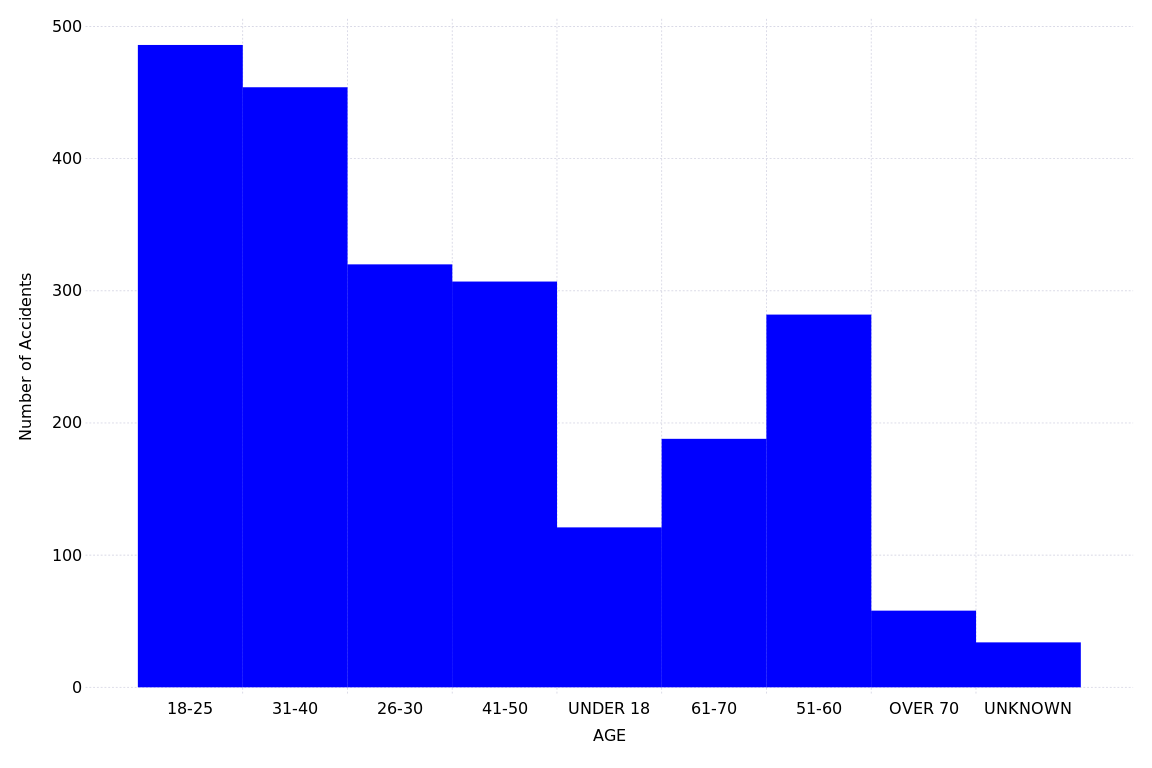

In [20]:
set_default_plot_size(12inch,8inch)
myplot4 = Gadfly.plot(new_data_nomissing, x = "AGE", Geom.histogram, Guide.ylabel("Number of Accidents"), white_panel);
draw(PNG("./Figs/scatter-plt1.png", 6inch, 6inch), myplot4)
myplot4

Age group of 18-25 is  involved in most number of the crashes.

**Q 16:** Load the "iris" dataset using the following command.

iris = dataset("datasets", "iris");

This dataset has information about flowers from three plant species.

Do:
1. List attributes in this data
2. Generate a scatter plot between "PetalLength" and "PetalWidth" where each point is colored based on "Sepecies". What observations can you make about the flowers from the three plant species based on this plot.

In [21]:
iris = dataset("datasets", "iris");

In [22]:
describe(iris[:, :])

,variable,mean,min,median,max,nunique,nmissing,eltype
1,SepalLength,5.84333,4.3,5.8,7.9,,,Float64
2,SepalWidth,3.05733,2.0,3.0,4.4,,,Float64
3,PetalLength,3.758,1.0,4.35,6.9,,,Float64
4,PetalWidth,1.19933,0.1,1.3,2.5,,,Float64
5,Species,,,,,3,,CategoricalArrays.CategoricalString{UInt8}


**Q 17:** Using Iris dataset, generate a box plot to compare the SepalWidth for the three plant species. Flowers from which species has generally longer sepalwidths?

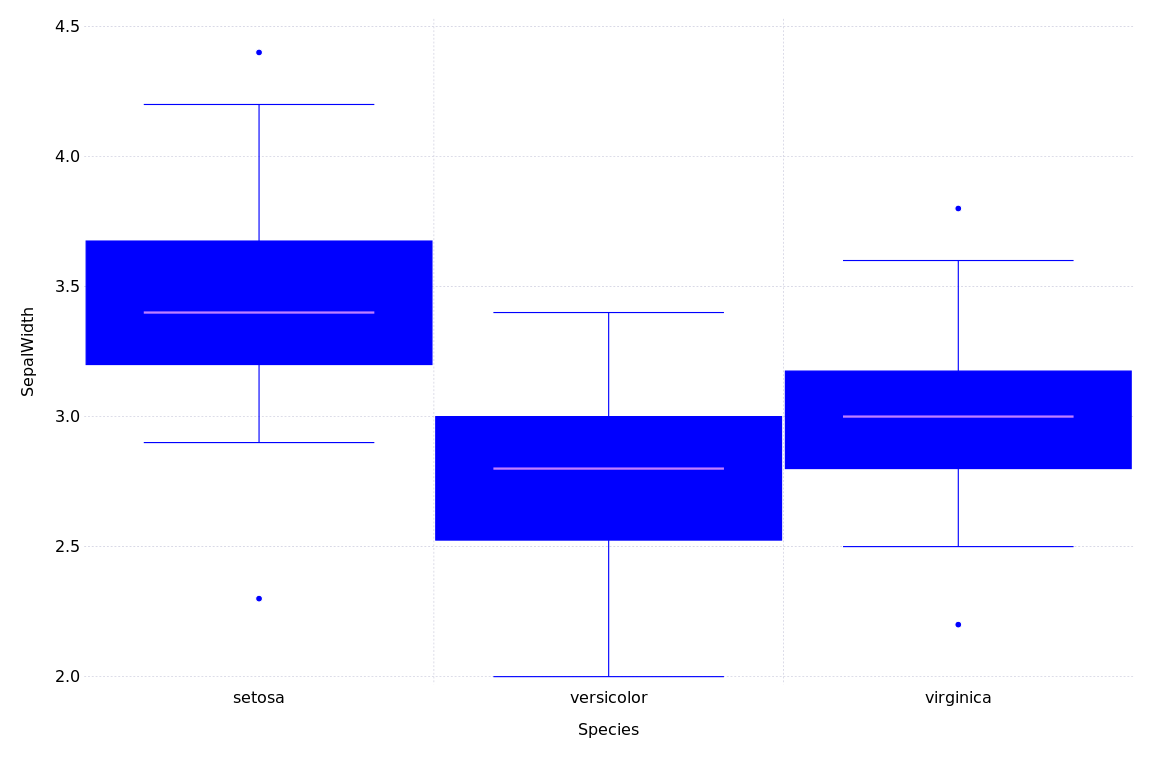

In [23]:
set_default_plot_size(12inch,8inch)
myplot5 = Gadfly.plot(iris, x = "Species", y="SepalWidth", Geom.boxplot, white_panel);
draw(PNG("./Figs/scatter-plt1.png", 6inch, 6inch), myplot5)
myplot5

Flowers from Setosa have larger SepalWidths

**Q 18:** Using Iris dataset, generate a violin plot for SepalWidth (similar to the box plot above). What new observations can you make from this plot, compared to the box plots you generated in response to **Q 17**.

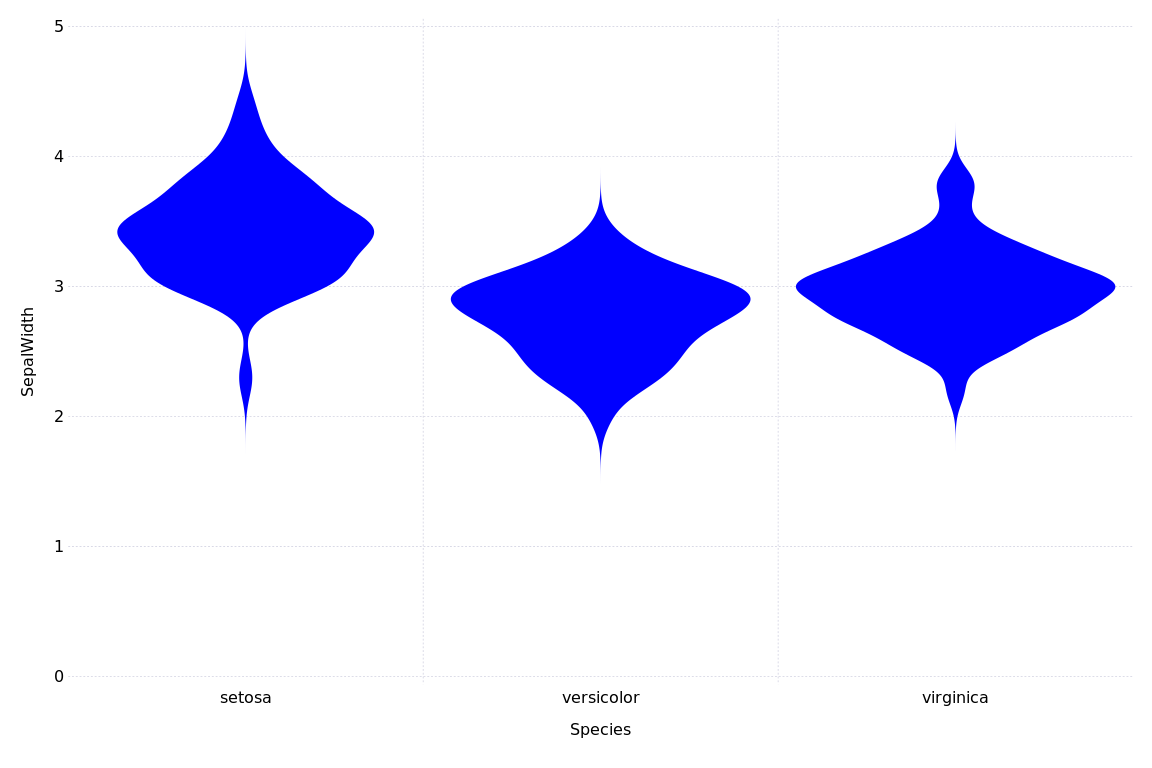

In [24]:
set_default_plot_size(12inch,8inch)
myplot6 = Gadfly.plot(iris, x = "Species", y = "SepalWidth", Geom.violin, white_panel);
draw(PNG("./Figs/scatter-plt1.png", 6inch, 6inch), myplot6)
myplot6

SepalWidth for Setosa are larger than the other species. We also get to know that majority of the flowers for Setosa have sepalwidths around 3.5, for versicolor it is around 2.8-3 and lastly for virginica it is around 3.